# Mohamed Abdelaaty

## Research question/interests

The primary interest is in the effect of elevation on the frequency and severity of car accidents.

The secondary interest is in the effect of time and weather conditions on the frequency and severity of car accidents.

In [4]:
# Import useful libraries
import sys
sys.path.append('../util')

import pandas as pd
import numpy as np
import math

## Data pipeline
from DataPipeline import DataPipeline as dp
from OpenElevationsWrapper import OpenElevationsApi as ElevationsApi

{'results': [{'latitude': 41.161758, 'longitude': -8.583933, 'elevation': 117}, {'latitude': 41.161758, 'longitude': -8.583933, 'elevation': 117}]}


In [2]:
# Import raw dataset
DATASET_FILE_RELATIVE_PATH = "../data/raw/US_Accidents_Dec20_updated.csv"

df = pd.read_csv(DATASET_FILE_RELATIVE_PATH)

In [3]:
## 1. Data exploration
# 1.1. Data overview
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
# 1.2. Columns
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
# 1.3. Data types
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [6]:
# 1.4. Missing values
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [7]:
# 1.5. Data description
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [8]:
# 1.6. Data distribution
df.groupby('Weather_Condition').count()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Weather_Condition,,,,,,,,,,,,,,,,,,,,,
Blowing Dust,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
Blowing Dust / Windy,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
Blowing Snow,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
Blowing Snow / Windy,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
Clear,180223,180223,180223,180223,180223,180223,180223,180223,180223,180223,...,180223,180223,180223,180223,180223,180223,180217,180217,180217,180217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tornado,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Volcanic Ash,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Widespread Dust,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43


<AxesSubplot:xlabel='Weather_Condition'>

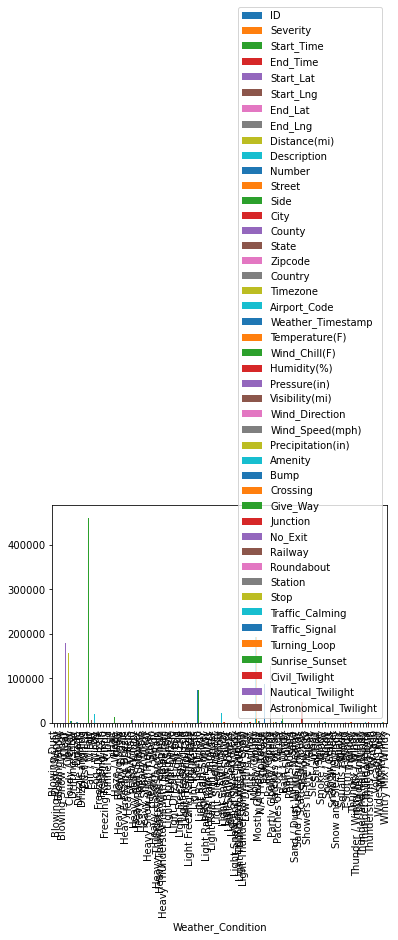

In [9]:
# 1.7. Data visualization
df.groupby('Weather_Condition').count().plot(kind='bar')

array([[<AxesSubplot:title={'center':'Severity'}>,
        <AxesSubplot:title={'center':'Start_Lat'}>,
        <AxesSubplot:title={'center':'Start_Lng'}>,
        <AxesSubplot:title={'center':'End_Lat'}>],
       [<AxesSubplot:title={'center':'End_Lng'}>,
        <AxesSubplot:title={'center':'Distance(mi)'}>,
        <AxesSubplot:title={'center':'Number'}>,
        <AxesSubplot:title={'center':'Temperature(F)'}>],
       [<AxesSubplot:title={'center':'Wind_Chill(F)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Pressure(in)'}>,
        <AxesSubplot:title={'center':'Visibility(mi)'}>],
       [<AxesSubplot:title={'center':'Wind_Speed(mph)'}>,
        <AxesSubplot:title={'center':'Precipitation(in)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

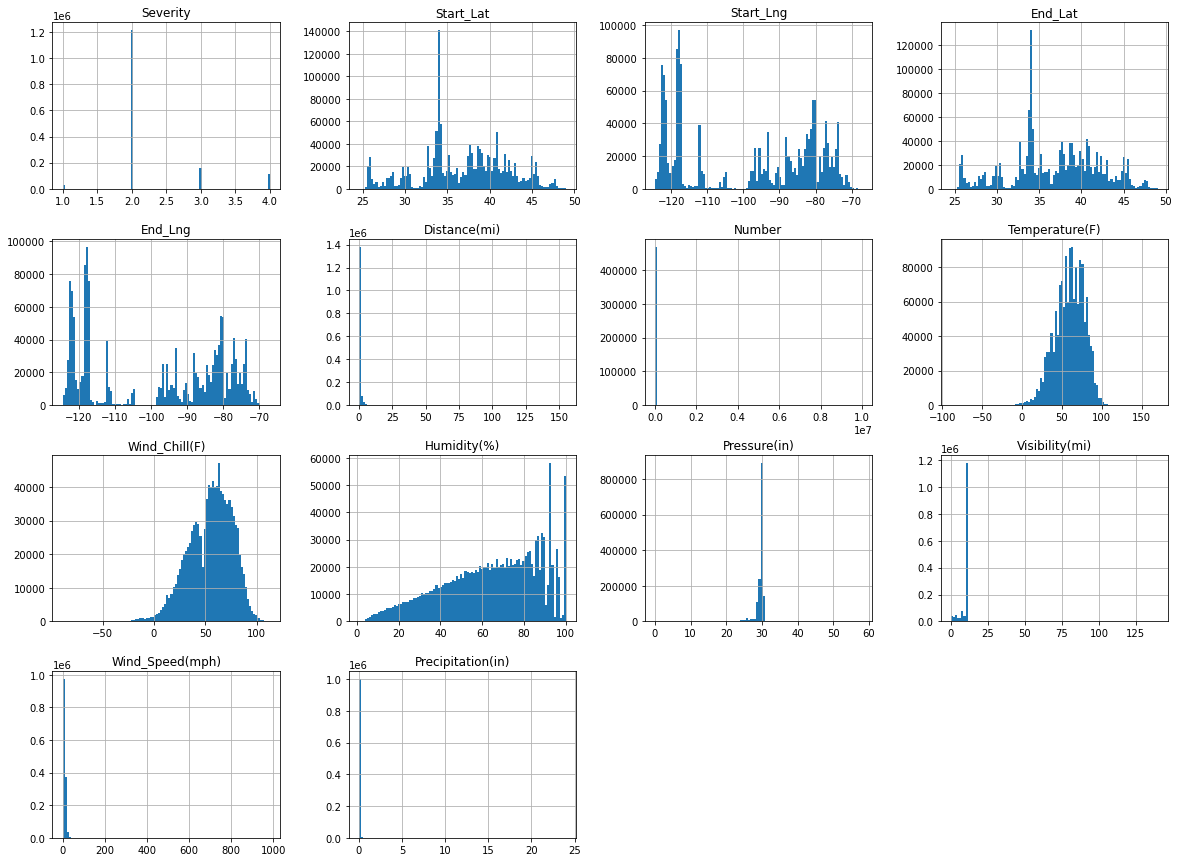

In [10]:
# 1.8. Histogram
df.hist(bins=100, figsize=(20,15))

In [11]:
# 1.9. Correlation
df.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.078723,0.179492,0.078729,0.179495,0.152869,-0.009666,-0.014952,-0.091947,0.047240,...,0.008090,0.021885,-0.001240,-0.004697,-0.000593,-0.012372,-0.000271,0.000864,-0.042802,NaN
Start_Lat,0.078723,1.000000,-0.099607,0.999995,-0.099602,0.041404,0.124377,-0.456720,-0.507982,0.044629,...,0.004707,-0.005741,-0.011859,0.005864,-0.006672,-0.054286,0.018116,0.000597,-0.070426,NaN
Start_Lng,0.179492,-0.099607,1.000000,-0.099591,0.999999,0.082412,-0.185956,-0.028814,-0.096016,0.199130,...,0.021456,-0.005603,0.005310,-0.014222,0.003033,0.023871,-0.040489,-0.002512,0.089101,NaN
End_Lat,0.078729,0.999995,-0.099591,1.000000,-0.099587,0.041459,0.124360,-0.456719,-0.507987,0.044626,...,0.004694,-0.005727,-0.011857,0.005866,-0.006672,-0.054285,0.018125,0.000594,-0.070425,NaN
End_Lng,0.179495,-0.099602,0.999999,-0.099587,1.000000,0.082393,-0.185949,-0.028812,-0.096013,0.199128,...,0.021453,-0.005602,0.005311,-0.014221,0.003033,0.023870,-0.040489,-0.002512,0.089099,NaN
Distance(mi),0.152869,0.041404,0.082412,0.041459,0.082393,1.000000,0.054719,-0.044103,-0.067638,0.039469,...,-0.001145,0.018292,-0.006599,-0.018523,-0.001811,-0.039244,-0.012171,-0.003731,-0.097484,NaN
Number,-0.009666,0.124377,-0.185956,0.124360,-0.185949,0.054719,1.000000,-0.054076,-0.048961,0.028274,...,-0.002873,-0.016275,-0.007412,-0.015040,-0.000783,-0.032563,0.001785,-0.003315,-0.083055,NaN
Temperature(F),-0.014952,-0.456720,-0.028814,-0.456719,-0.028812,-0.044103,-0.054076,1.000000,0.992669,-0.387202,...,-0.001557,0.021944,0.010706,0.003572,0.003291,0.039713,-0.008945,0.001135,0.082931,NaN
Wind_Chill(F),-0.091947,-0.507982,-0.096016,-0.507987,-0.096013,-0.067638,-0.048961,0.992669,1.000000,-0.369361,...,-0.004335,-0.016796,0.010603,0.008877,0.004697,0.054814,0.000539,0.003320,0.101893,NaN
Humidity(%),0.047240,0.044629,0.199130,0.044626,0.199128,0.039469,0.028274,-0.387202,-0.369361,1.000000,...,0.001489,0.002460,-0.009685,-0.000550,0.002772,-0.003585,-0.008570,-0.003021,-0.056239,NaN


<AxesSubplot:>

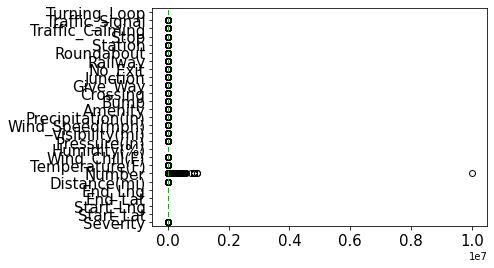

In [12]:
# 1.10. boxplot
df.boxplot(grid=False, vert=False,fontsize=15)

In [13]:
## 2. Data preprocessing
# 2.1. Data cleaning
# 2.1.1. Remove rows with missing values
df = df.dropna()


In [14]:
# 2.1.2. Drop duplicates
df = df.drop_duplicates()

In [15]:
# 2.1.3. Remove unnecessary columns
df = df.drop([
    'Distance(mi)', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
], axis=1)

In [16]:
# New dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334821 entries, 44 to 1516029
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     334821 non-null  object 
 1   Severity               334821 non-null  int64  
 2   Start_Time             334821 non-null  object 
 3   End_Time               334821 non-null  object 
 4   Start_Lat              334821 non-null  float64
 5   Start_Lng              334821 non-null  float64
 6   End_Lat                334821 non-null  float64
 7   End_Lng                334821 non-null  float64
 8   Description            334821 non-null  object 
 9   Weather_Timestamp      334821 non-null  object 
 10  Temperature(F)         334821 non-null  float64
 11  Wind_Chill(F)          334821 non-null  float64
 12  Humidity(%)            334821 non-null  float64
 13  Pressure(in)           334821 non-null  float64
 14  Visibility(mi)         334821 non-

In [17]:
# 2.2. Data preprocessing
# 2.2.1. Data type conversion
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [59]:
lat = df['Start_Lat'].to_numpy()
long = df['Start_Lng'].to_numpy()

lat_long = list()

for la, lo in zip(lat, long):
    lat_long.append({"latitude": la, "longitude": lo})


In [64]:
len(lat_long)

334821

In [ ]:
lat_long[0:math.floor(len(lat_long)/30)]

In [90]:
ElevationsApiOutput = list()

In [106]:
# Construct Elevations Mapping
OpenEA = ElevationsApi()

start = 8000
end = 10000

for i in range( math.floor( len(lat_long)/2000) ):
    OpenEA.withMultipleLoc(lat_long[start:end])
    response = OpenEA.post()
    if (response.status_code == 200):
        ElevationsApiOutput.append(response.json()["results"])
    
    start += 2000
    end += 2000
    if end >= len(lat_long):
        break


In [112]:
import csv

keys = ElevationsApiOutput[0][0].keys()

dict_keys(['latitude', 'longitude', 'elevation'])

In [114]:
# Construct Elevations CSV File

with open('../data/processed/elevations.csv', 'a', newline='') as csvfile:
    for entries in ElevationsApiOutput:
        for entry in entries:
            writer = csv.DictWriter(csvfile, fieldnames=['latitude', 'longitude', 'elevation', 'error'])
            writer.writerow(entry)

In [121]:
df_elevations = pd.read_csv('../data/processed/elevations.csv')

C:\Users\mfare\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [147]:
df_elevations.columns
df_elevations.rename(columns={'Latitude': 'Start_Lat', 'Longitude': 'Start_Lng'}, inplace=True)

In [161]:
# df_mixed = pd.merge(df, df_elevations, left_on=['Start_Lat', 'Start_Lng'], right_on=['Latitude', 'Longitude'])
df_mixed = pd.merge(df, df_elevations, how="left", on=['Start_Lat', 'Start_Lng'])

In [124]:
# save new dataset
df_mixed.to_csv('../data/processed/US_Accidents_Dec20_updated_processed_with_elevation.csv', index=False)

In [169]:
df_mixed.dropna(inplace=True)

In [177]:
df_mixed.drop_duplicates(inplace=True)

In [179]:
df_elevations.count()

Start_Lat    163897
Start_Lng    163897
Elevation    163897
dtype: int64

In [181]:
df_mixed

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Description,Weather_Timestamp,...,Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Elevation
70,A-2729981,2,2016-12-12 06:53:43,2016-12-12 12:53:43,44.964900,-93.244740,44.965860,-93.247260,At Cedar Ave/Exit 234 - Accident.,2016-12-12 06:53:00,...,WSW,9.2,0.00,Light Snow,False,Night,Night,Day,Day,256.0
86,A-2732319,2,2017-01-06 06:35:09,2017-01-06 12:35:09,30.434340,-91.176860,30.430210,-91.173570,At Washington St/Exit 155/Exit 156 - Accident.,2017-01-06 06:53:00,...,North,10.4,0.02,Overcast,False,Night,Night,Day,Day,20.0
101,A-2733450,2,2017-01-16 18:27:18,2017-01-17 00:27:18,44.766970,-93.034750,44.764890,-93.034530,At MN-55/Courthouse Blvd - Accident.,2017-01-16 18:29:00,...,NE,6.9,0.02,Overcast,False,Night,Night,Night,Day,283.0
124,A-2737423,2,2016-11-22 08:29:03,2016-11-22 14:29:03,44.863020,-93.249320,44.862280,-93.252530,Ramp to Cedar Ave - Accident.,2016-11-22 08:32:00,...,ESE,18.4,0.00,Light Rain,False,Day,Day,Day,Day,250.0
161,A-2749632,3,2016-12-01 16:23:26,2016-12-01 22:23:26,42.153860,-88.062860,42.153860,-88.062803,At CR-5/CR-V62/N Quentin Rd - Accident.,2016-12-01 16:52:00,...,West,5.8,0.00,Overcast,False,Night,Day,Day,Day,257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917197,A-4239316,2,2019-08-23 16:43:29,2019-08-23 20:43:29,44.102760,-121.299060,44.104241,-121.298180,At NE Cooley Rd - Accident.,2019-08-23 16:35:00,...,N,6.0,0.00,Fair,False,Day,Day,Day,Day,1066.0
917204,A-4239323,2,2019-08-23 17:14:59,2019-08-23 21:14:59,43.280130,-121.172950,43.334006,-121.172810,At Fort Rock Rd - Accident.,2019-08-23 17:15:00,...,CALM,0.0,0.00,Fair,False,Day,Day,Day,Day,1387.0
917206,A-4239324,2,2019-08-23 17:13:57,2019-08-23 21:13:57,45.379270,-122.603740,45.378776,-122.603367,At I-205/Veterans Memorial Hwy - Accident.,2019-08-23 16:53:00,...,ENE,7.0,0.00,Fair,False,Day,Day,Day,Day,17.0
917208,A-4239332,2,2019-08-23 18:12:43,2019-08-23 22:12:43,46.131980,-123.376140,46.131332,-123.375192,At Kerry Rd - Accident.,2019-08-23 17:56:00,...,WNW,10.0,0.00,Cloudy,False,Day,Day,Day,Day,8.0


In [139]:
df.dtypes

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Description                      object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object
Amenity                            bool
Sunrise_Sunset                   object
Civil_Twilight                   object
Nautical_Twilight                object
Astronomical_Twilight            object
dtype: object

In [135]:
df_elevations.drop(columns=['Error'], inplace=True)

In [136]:
df_elevations.dropna(inplace=True)

In [137]:
df_elevations.count()

Latitude     163897
Longitude    163897
Elevation    163897
dtype: int64

In [182]:
df_mixed.to_csv('../data/processed/US_Accidents_Dec20_updated_processed_with_elevation.csv', index=False)

In [5]:
df = pd.read_csv('../data/processed/US_Accidents_Dec20_updated_processed_with_elevation.csv')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,166363.0,2.206963,0.700831,1.000000,2.000000,2.000000,2.000000,4.00000
Start_Lat,166363.0,37.907518,5.357386,24.574730,34.077366,38.197315,42.174674,48.99333
Start_Lng,166363.0,-100.613140,18.899620,-124.497567,-120.018409,-97.565530,-81.115175,-67.48413
End_Lat,166363.0,37.907458,5.357143,24.583640,34.077377,38.197315,42.173825,48.99333
End_Lng,166363.0,-100.612723,18.899272,-124.497478,-120.018409,-97.565530,-81.112400,-67.48413
Temperature(F),166363.0,61.419343,18.205895,-27.000000,50.000000,63.000000,75.000000,111.00000
Wind_Chill(F),166363.0,60.231628,20.215740,-48.500000,49.000000,63.000000,75.000000,111.00000
Humidity(%),166363.0,61.268052,23.931686,1.000000,43.000000,63.000000,82.000000,100.00000
Pressure(in),166363.0,29.162968,1.292989,20.130000,29.020000,29.630000,29.920000,31.01000
Visibility(mi),166363.0,9.179992,2.727079,0.000000,10.000000,10.000000,10.000000,100.00000
